In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os
import collections
project_path = os.path.expanduser('~/repos/laplace_operator_metric_graph/')
sys.path.append(project_path)
import construct_graph
import solve_laplace_operator
from helper_functions import style_plot, sequential_Newton

%load_ext autoreload
%autoreload 2

#### Load eigenvalues

In [2]:
with open("../data/aperiodic_monotile_eigenvalues.pkl", "rb") as file:
    torus_eigenvalues = pickle.load(file)

#### Verify that calculated eigenvalues match loaded values

In [31]:
# Patch sizes
nums_Vs_params = (np.linspace(9**0.5, 91**0.5, 21)**2)[:13]

# Number of patches (patch translations) to get statistics for patch size
translate_params = np.array(list(16 * np.ones(8)) + list(8 * np.ones(2)) + list(4 * np.ones(3))).astype(int)

size = 2
number = 3 

np.random.seed(0)

g = construct_graph.patch_graph.Aperiodic_Monotile(nums_Vs_params[size], number * np.array([1, 1]))
g = construct_graph.patch_graph.Patch(g)

eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
guesses = np.linspace(2.7, 3.9, 30)
full_solutions = sequential_Newton(guesses, eigs, min_eigenvalue=0, max_eigenvalue=10)
eigenvalue_data = full_solutions.copy()

print()
print(f"calculated eigenvalues \t\t = {eigenvalue_data}")
print(f"eigenvalues from loaded data \t = {torus_eigenvalues[(size, g.num_Vs, number)]}")


Calculating eig number 0

----------------------
Converged at step 1:

k = 3.3132183110951057
----------------------

Calculating eig number 1

----------------------
Converged at step 2:

k = 3.3819587625484258
----------------------

Calculating eig number 2

----------------------
Converged at step 1:

k = 3.4409205504347407
----------------------

Calculating eig number 3

----------------------
Converged at step 2:

k = 3.47467869037572
----------------------

calculated eigenvalues 		 = [3.31321831 3.38195876 3.44092055 3.47467869]
eigenvalues from loaded data 	 = [3.31321831 3.38195876 3.44092055 3.47467869]


#### Load relative errors for eigenvalues/functions 

In [3]:
with open("../data/aperiodic_monotile_eigenmode_rel_errs.pkl", "rb") as file:
    rel_errs = pickle.load(file)

In [ ]:
m, n = 0, 1
problem = "square_flat_torus"
graph_type = "aperiodic_monotile"

graph_ks = eigenvalue_data.copy()
p = solve_laplace_operator.solve_laplace_operator_update.Projector(g, m, n, torus_eigenvalues[(size, g.num_Vs, number)], problem, graph_type)

#### Plot modes

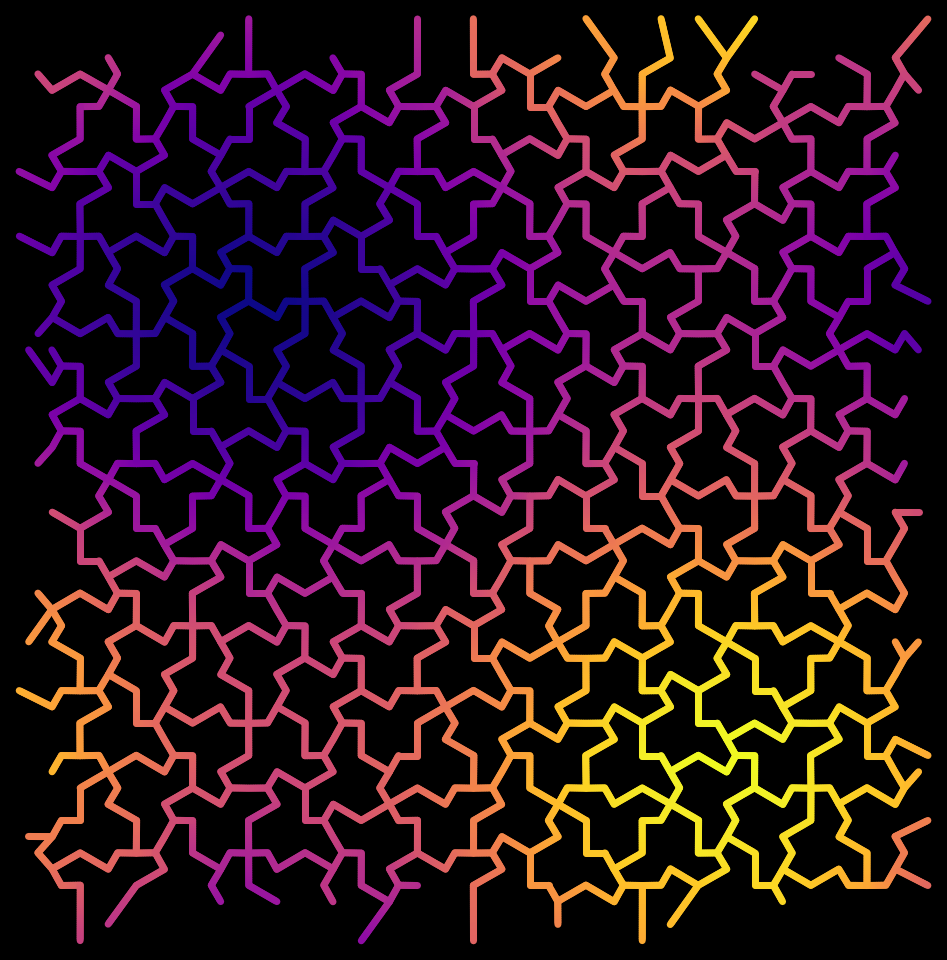

In [56]:
mode_number = 0
g.plot_graph(eigenmode=p.graph_eigenfunctions[mode_number].data, background_color="black", figsize=10)

#### Set up data for plotting

In [4]:
eigenvalue_difs, eigenfunction_difs = rel_errs

x = np.array(list(eigenvalue_difs.keys()))

y_eigenvalue = np.array([np.mean(i) for i in eigenvalue_difs.values()])
dy = np.array([np.std(i) for i in eigenvalue_difs.values()])
y_ratio_upper = y_eigenvalue * (1 + dy / y_eigenvalue)  # Equivalent to y + dy
y_ratio_lower = y_eigenvalue / (1 + dy / y_eigenvalue)  # Avoids y - dy < 0
y_err_upper_eigenvalue = (y_ratio_upper - y_eigenvalue)
y_err_lower_eigenvalue = (y_eigenvalue - y_ratio_lower)

y_eigenfunction = np.array([np.mean(i) for i in eigenfunction_difs.values()])
dy = np.array([np.std(i) for i in eigenfunction_difs.values()])
y_ratio_upper = y_eigenfunction * (1 + dy / y_eigenfunction)  # Equivalent to y + dy
y_ratio_lower = y_eigenfunction / (1 + dy / y_eigenfunction)  # Avoids y - dy < 0
y_err_upper_eigenfunction = (y_ratio_upper - y_eigenfunction)
y_err_lower_eigenfunction = (y_eigenfunction - y_ratio_lower)

#### Plot

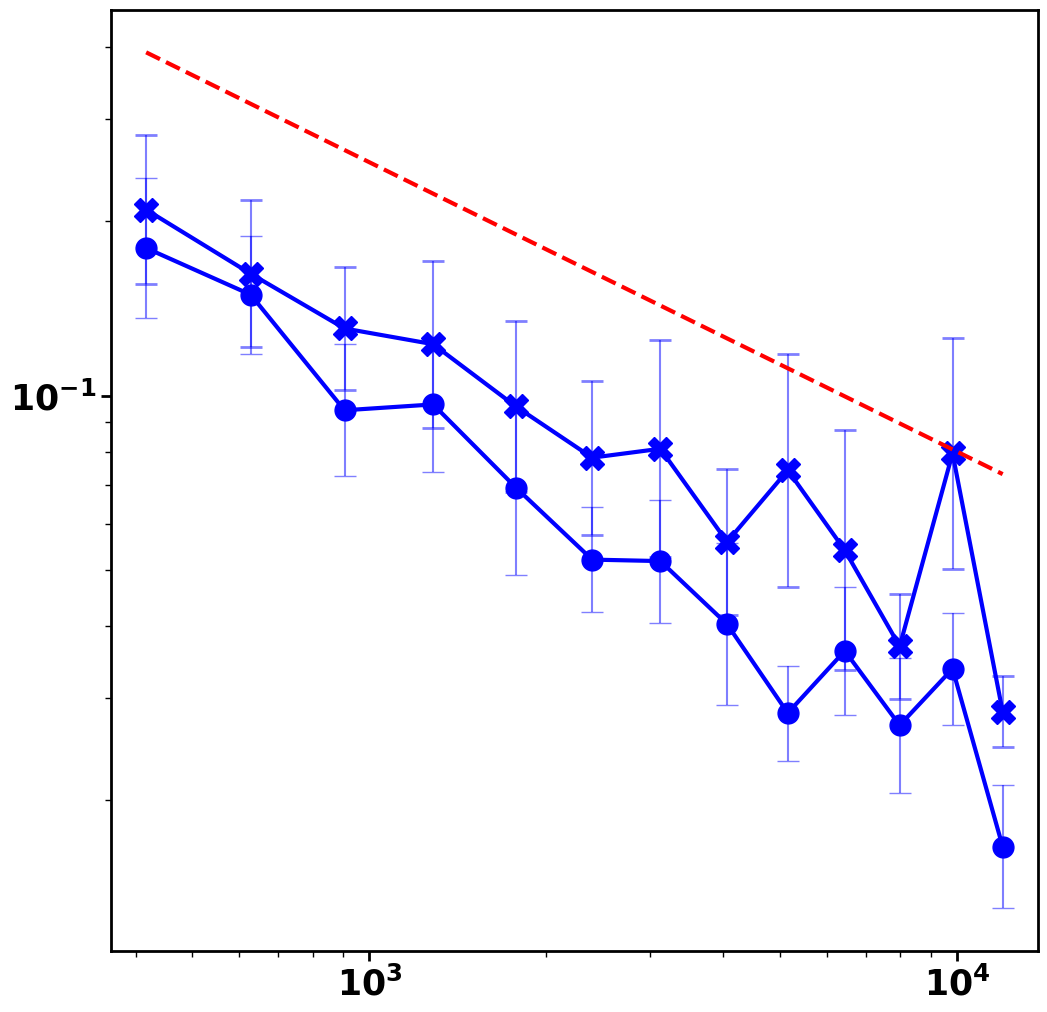

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 15

ax.errorbar(x, y_eigenvalue, yerr=[y_err_lower_eigenvalue, y_err_upper_eigenvalue], capsize=8, c='b', alpha=0.5, zorder=0)
ax.loglog(x, y_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.errorbar(x, y_eigenfunction, yerr=[y_err_lower_eigenfunction, y_err_upper_eigenfunction], capsize=8, capthick=2, c='b', alpha=0.5, zorder=0)
ax.loglog(x, y_eigenfunction, 'X-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize*1.15)

ax.loglog(x, x**(-0.5) * 8, '--', c='r', linewidth=eigenvalue_linewidth)

x_min, x_max = x.min(), x.max()
ax.set_xlim(10**(np.log10(x_min) - 0.06), 10**(np.log10(x_max) + 0.06))

style_plot(fig, ax, aspect=None)

plt.show()